In [15]:
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [17]:
#读取数据
iris_features=u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path='./iris.data'#数据文件路径
data=pd.read_csv(path,header=None)
x,y=data[list(range(4))],data[4]
y=pd.Categorical(y).codes
x=x[[0,1]]


In [18]:
#数据分割
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=28,train_size=0.6)

E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
## 数据SVM分类器构建
svm1=SVC(C=1,kernel='linear')
svm2=SVC(C=1,kernel='rbf')
svm3=SVC(C=1,kernel='poly')
svm4=SVC(C=1,kernel='sigmoid')

## 模型训练
t0=time.time()
svm1.fit(x_train,y_train)
t1=time.time()
svm2.fit(x_train,y_train)
t2=time.time()
svm3.fit(x_train,y_train)
t3=time.time()
svm4.fit(x_train,y_train)
t4=time.time()


E:\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
#效果评估
svm1_score1=accuracy_score(y_train,svm1.predict(x_train))
svm1_score2=accuracy_score(y_test,svm1.predict(x_test))

svm2_score1=accuracy_score(y_train,svm2.predict(x_train))
svm2_score2=accuracy_score(y_train,svm2.predict(x_train))

svm3_score1=accuracy_score(y_train,svm3.predict(x_train))
svm3_score2=accuracy_score(y_train,svm3.predict(x_train))

svm4_score1=accuracy_score(y_train,svm4.predict(x_train))
svm4_score2=accuracy_score(y_train,svm4.predict(x_train))



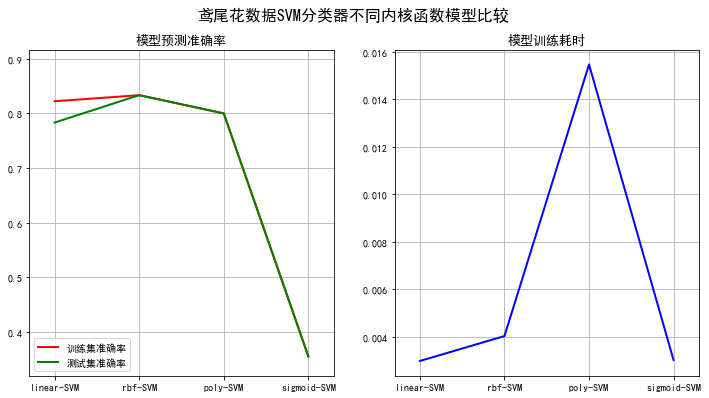

In [23]:
#画图
x_tmp=[0,1,2,3]
t_score=[t1-t0,t2-t1,t3-t2,t4-t3]
y_score1=[svm1_score1,svm2_score1,svm3_score1,svm4_score1]
y_score2=[svm1_score2,svm2_score2,svm3_score2,svm4_score2]

plt.figure(facecolor='w',figsize=(12,6))
plt.subplot(121)
plt.plot(x_tmp,y_score1,'r-',lw=2,label=u'训练集准确率')
plt.plot(x_tmp,y_score2,'g-',lw=2,label=u'测试集准确率')
plt.xlim(-0.3,3.3)
plt.ylim(np.min((np.min(y_score1),np.min(y_score2)))*0.9,np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc='lower left')
plt.title(u'模型预测准确率',fontsize=13)
plt.xticks(x_tmp,[u'linear-SVM',u'rbf-SVM',u'poly-SVM',u'sigmoid-SVM'])
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'模型训练时间')
plt.title(u'模型训练耗时', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.xlim(-0.3, 3.3)
plt.grid(b=True)

plt.suptitle(u'鸢尾花数据SVM分类器不同内核函数模型比较', fontsize=16)

plt.show()